### 1) Import necessary libraries:

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### 2) Load & Analyze Dataset:

In [2]:
#Load the dataset
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

#Display first five records
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
#Checking for null values
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [5]:
#Drop the records with null values in particular column which are part of subsety
new_df = df.dropna(subset=['Tenure','WarehouseToHome','HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder'])

In [6]:
#Shows the shape of the new dataframe
new_df.shape

(3774, 20)

In [7]:
#Checking for null values
new_df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### 3) Exploratory Data Analysis

In [8]:
# Add ratio labels on top of each bar for categorical features
def plot_label(plot, x_col):
    # Get the unique categories for x_col
    categories = new_df[x_col].unique()
    group_totals = new_df[x_col].value_counts()
    
    for ax in plot.patches:
        height = ax.get_height()
        x_index = int(round(ax.get_x()))
        category = categories[x_index]
        total_count = group_totals[category]
        
        # Calculate the ratio
        if total_count > 0:
            plot.text(
                ax.get_x() + ax.get_width() / 2, 
                height, 
                f'{height / total_count:.2f}', 
                ha='center', 
                va='bottom', 
                fontsize=12, 
            )

In [9]:
# Add ratio labels on top of each bar for numeric features
def plot_label_ratio(plot, x_col):
    # Get the unique categories for x_col
    categories = sorted(new_df[x_col].unique())
    group_totals = new_df[x_col].value_counts()
    
    for ax in plot.patches:
        height = ax.get_height()
        x_index = int(round(ax.get_x()))
        category = categories[x_index]
        total_count = group_totals[category]

        # Calculate the ratio
        if total_count > 0:
            plot.text(
                ax.get_x() + ax.get_width() / 2, 
                height, 
                f'{height / total_count:.2f}', 
                ha='center', 
                va='bottom', 
                fontsize=12, 
            )

### a) Distribution of Churn

Churn
0    3143
1     631
Name: count, dtype: int64




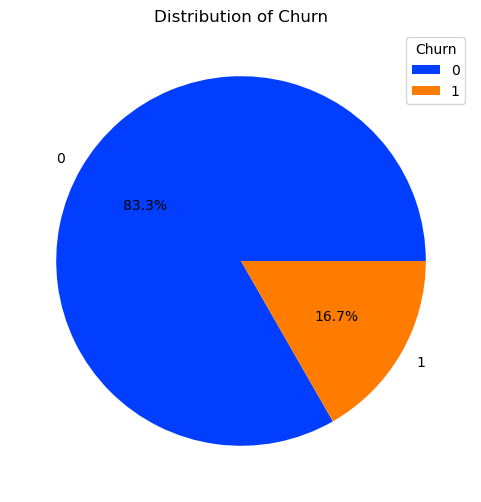

In [10]:
#Distribution of churn
churn_count = new_df['Churn'].value_counts()
print(churn_count)
print('\n')

color = sns.color_palette("bright")

plt.figure(figsize=(6,6))
plt.pie(churn_count.values, labels=churn_count.index, colors=color, autopct='%1.1f%%')
plt.title("Distribution of Churn")
plt.legend(title='Churn')
plt.show()

### b) Churn by Marital Status

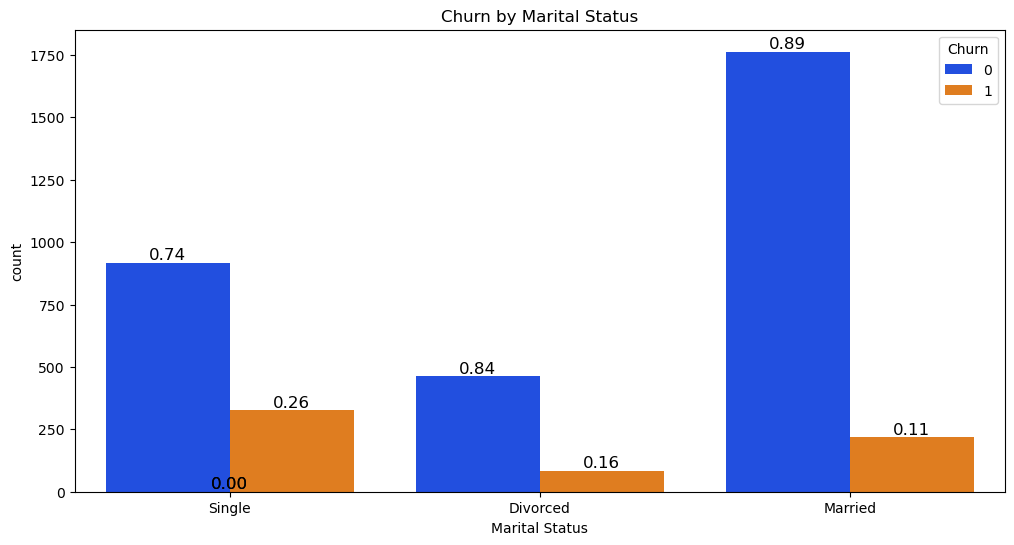

In [11]:
# Churn by Marital Status
plt.figure(figsize=(12,6))
ax = sns.countplot(x='MaritalStatus', hue='Churn', data=new_df, palette='bright')
plot_label(ax,"MaritalStatus")
plt.xlabel('Marital Status')
plt.title("Churn by Marital Status")
plt.show()

### c) Churn by Preferred Payment Mode

In [12]:
# Replace "CC" with "Credit Card" & "COD" with "Cash on Delivery"
new_df['PreferredPaymentMode'] = new_df['PreferredPaymentMode'].replace('CC', 'Credit Card')
new_df['PreferredPaymentMode'] = new_df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')

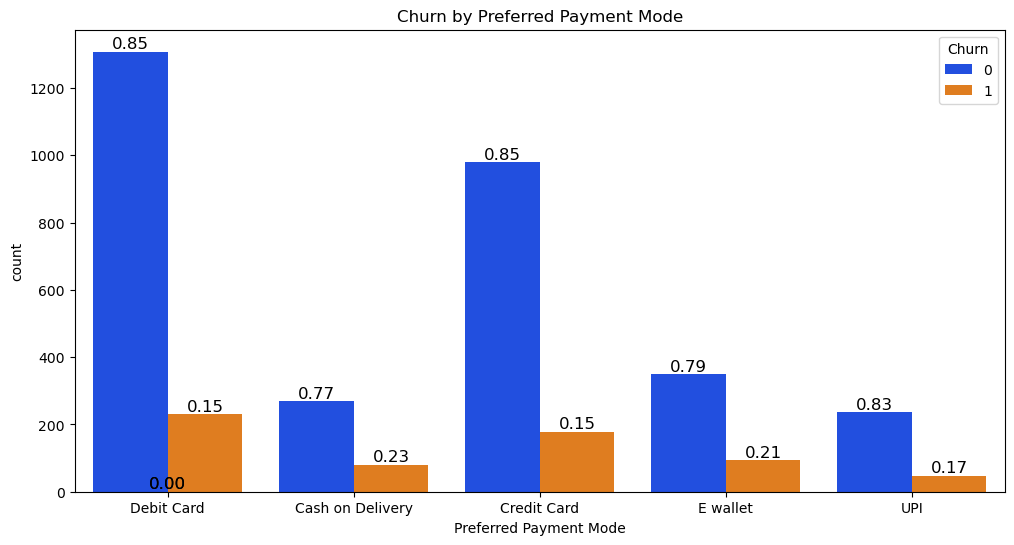

In [13]:
# Churn by Preferred Payment Mode
plt.figure(figsize=(12,6))
ax = sns.countplot(x='PreferredPaymentMode', hue='Churn', data=new_df, palette='bright')
plot_label(ax, "PreferredPaymentMode")
plt.xlabel('Preferred Payment Mode')
plt.title("Churn by Preferred Payment Mode")
plt.show()

### d) Churn by Gender

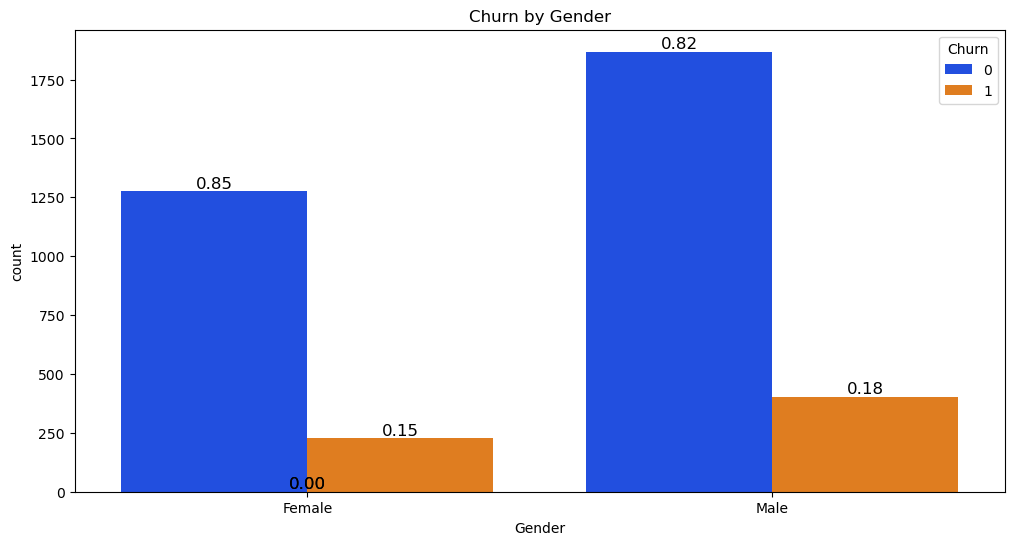

In [14]:
# Churn by Gender
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Gender', hue='Churn', data=new_df, palette='bright')
plot_label(ax, "Gender")
plt.title("Churn by Gender")
plt.show()

### e) Churn by Prefered Order Category

In [15]:
new_df['PreferedOrderCat'] = new_df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

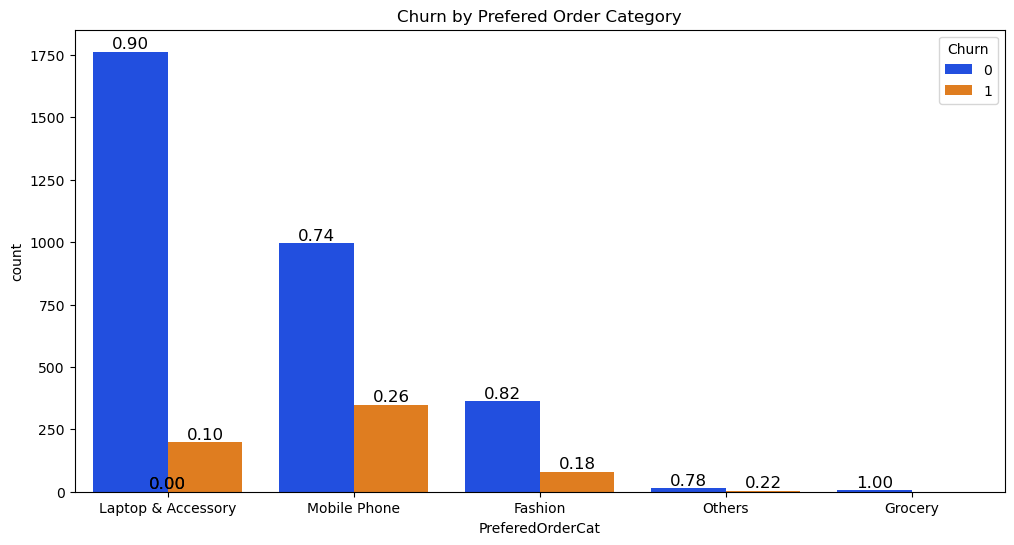

In [16]:
# Churn by Prefered Order Category
plt.figure(figsize=(12,6))
ax = sns.countplot(x='PreferedOrderCat', hue='Churn', data=new_df, palette='bright')
plot_label(ax, "PreferedOrderCat")
plt.title("Churn by Prefered Order Category")
plt.show()

### f) Churn by City Tier

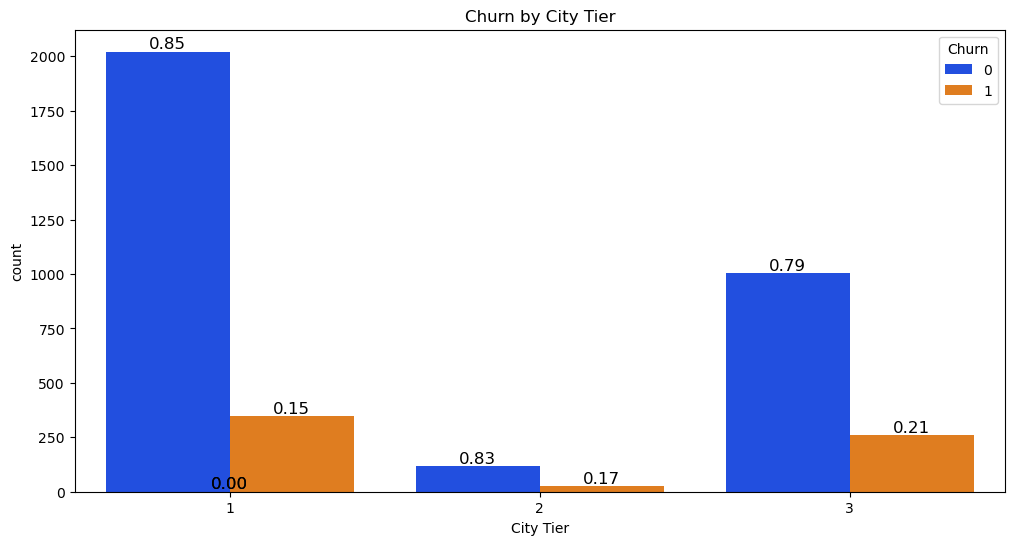

In [17]:
# Churn by City Tier
plt.figure(figsize=(12,6))
ax = sns.countplot(x='CityTier', hue='Churn', data=new_df, palette='bright')
plot_label_ratio(ax, "CityTier")
plt.xlabel('City Tier')
plt.title("Churn by City Tier")
plt.show()

### g) Churn by Satisfaction Score

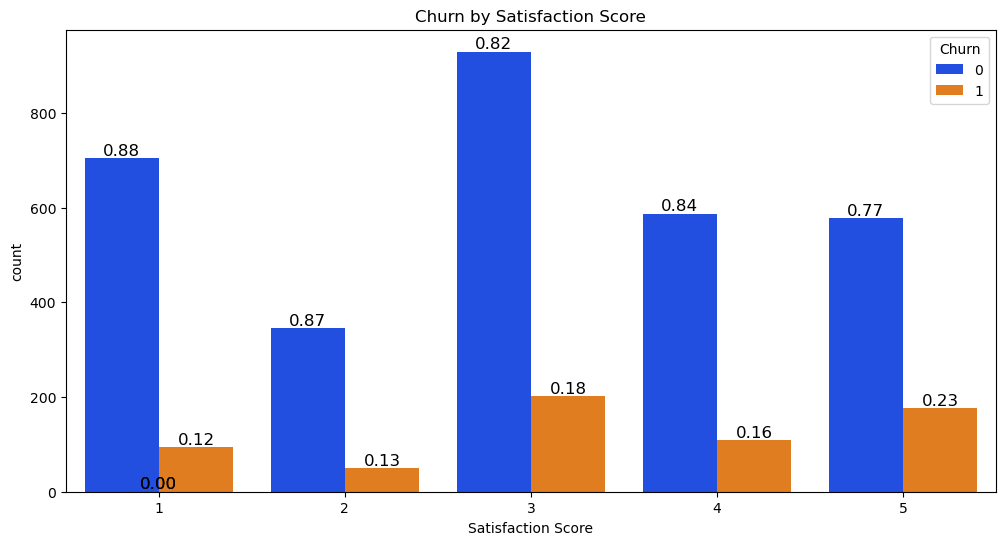

In [18]:
# Churn by Satisfaction Score
plt.figure(figsize=(12,6))
ax = sns.countplot(x='SatisfactionScore', hue='Churn', data=new_df, palette='bright')
plot_label_ratio(ax, 'SatisfactionScore')
plt.xlabel('Satisfaction Score')
plt.title("Churn by Satisfaction Score")
plt.show()

### h) Churn by Hour Spend On App

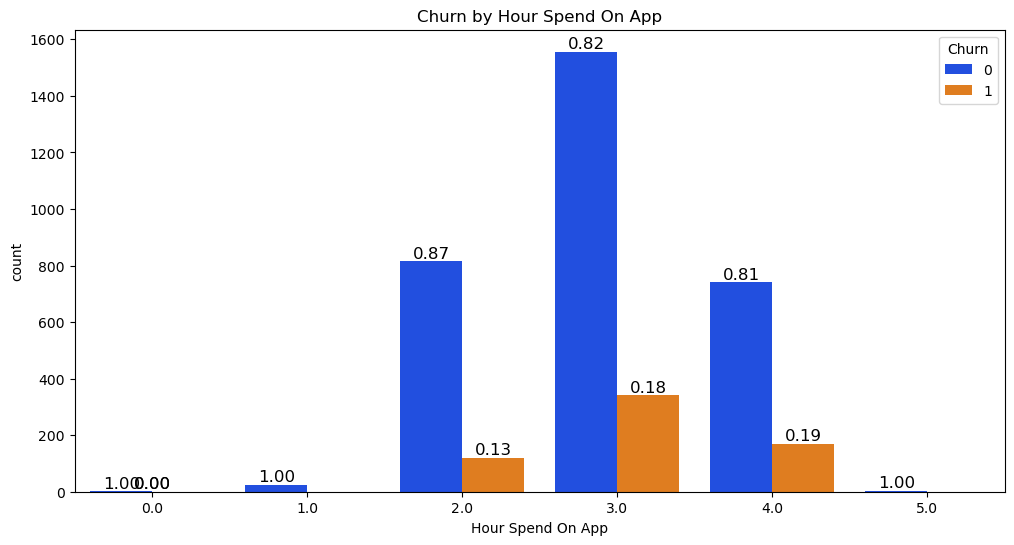

In [19]:
# Churn by Hour Spend On App
plt.figure(figsize=(12,6))
ax = sns.countplot(x='HourSpendOnApp', hue='Churn', data=new_df, palette='bright')
plot_label_ratio(ax, 'HourSpendOnApp')
plt.xlabel("Hour Spend On App")
plt.title("Churn by Hour Spend On App")
plt.show()

### i) Churn by Number Of Device Registered

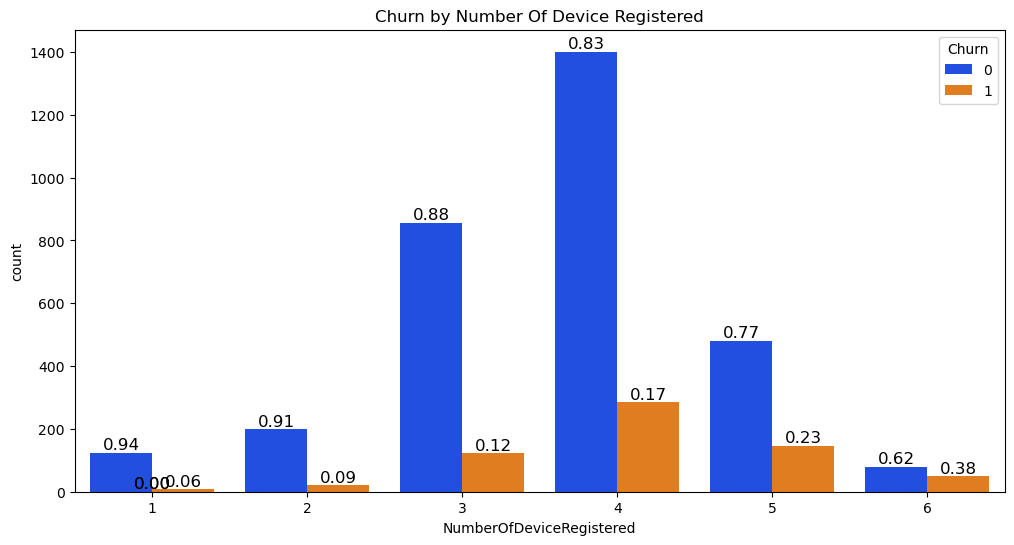

In [20]:
# Churn by Number Of Device Registered
plt.figure(figsize=(12,6))
ax = sns.countplot(x='NumberOfDeviceRegistered', hue='Churn', data=new_df, palette='bright')
plot_label_ratio(ax, 'NumberOfDeviceRegistered')
plt.title("Churn by Number Of Device Registered")
plt.show()

### j) Churn by Cashback Amount

In [21]:
min_cashback = new_df['CashbackAmount'].min()
max_cashback = new_df['CashbackAmount'].max()
print(f"Minimum cash back: ", min_cashback)
print(f"Maximum cash back: ", max_cashback)

Minimum cash back:  0.0
Maximum cash back:  324.99


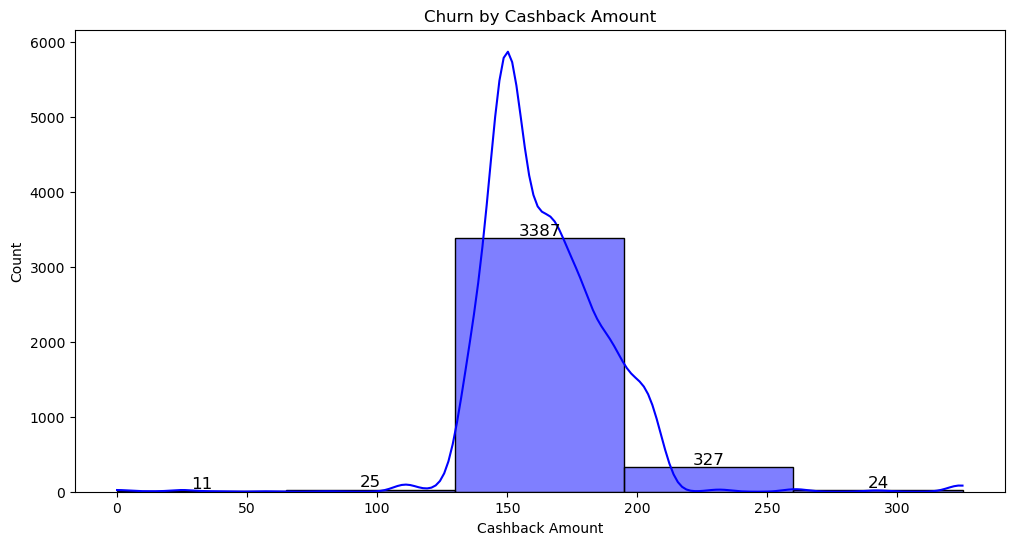

In [22]:
# Churn by Cashback Amount
plt.figure(figsize=(12,6))
plot = sns.histplot(new_df['CashbackAmount'], bins=5, kde=True, color = 'blue')

for ax in plot.patches:
    height = ax.get_height()
    plot.text(
        ax.get_x() + ax.get_width() / 2, 
        height, 
        f'{height}', 
        ha='center', 
        va='bottom', 
        fontsize=12, 
    )

plt.xlabel("Cashback Amount")
plt.title("Churn by Cashback Amount")
plt.show()

### 4) Machine Learning

#### a) With Imbalanced Data

In [23]:
#Differntiate Features and Targets
X = new_df.iloc[:,2:20]
y = new_df.iloc[:,1]

#Label encoding 
label_encoder = preprocessing.LabelEncoder()

for var in X:
    if(type(var) != 'int64' and type(var) != 'float64'):
        X[var] = label_encoder.fit_transform(X[var])


Logistic Regression (Imbalanced Data):
Accuracy: 0.89


              precision    recall  f1-score   support

           0       0.91      0.96      0.94       648
           1       0.65      0.44      0.53       107

    accuracy                           0.89       755
   macro avg       0.78      0.70      0.73       755
weighted avg       0.88      0.89      0.88       755



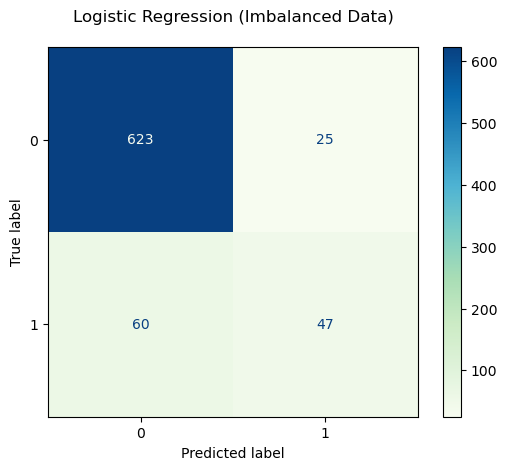

Decision Tree (Imbalanced Data):
Accuracy: 0.97


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       648
           1       0.91      0.91      0.91       107

    accuracy                           0.97       755
   macro avg       0.95      0.95      0.95       755
weighted avg       0.97      0.97      0.97       755



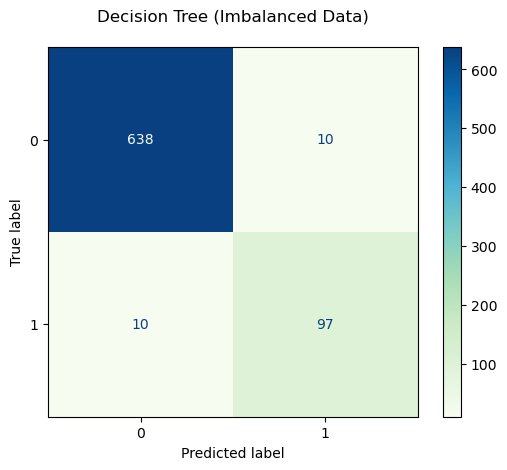

Random Forest (Imbalanced Data):
Accuracy: 0.97


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       648
           1       0.95      0.82      0.88       107

    accuracy                           0.97       755
   macro avg       0.96      0.91      0.93       755
weighted avg       0.97      0.97      0.97       755



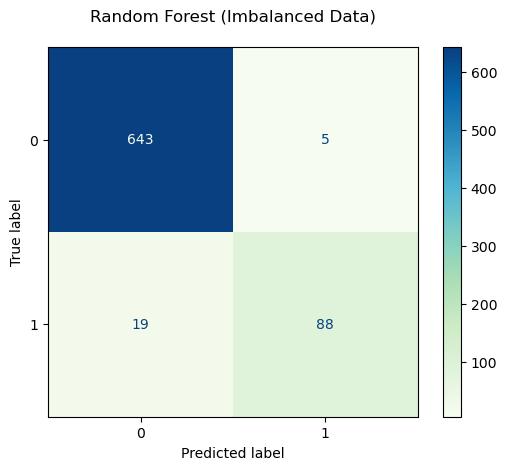

Gradient Boosting (Imbalanced Data):
Accuracy: 0.93


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       648
           1       0.83      0.60      0.70       107

    accuracy                           0.93       755
   macro avg       0.88      0.79      0.83       755
weighted avg       0.92      0.93      0.92       755



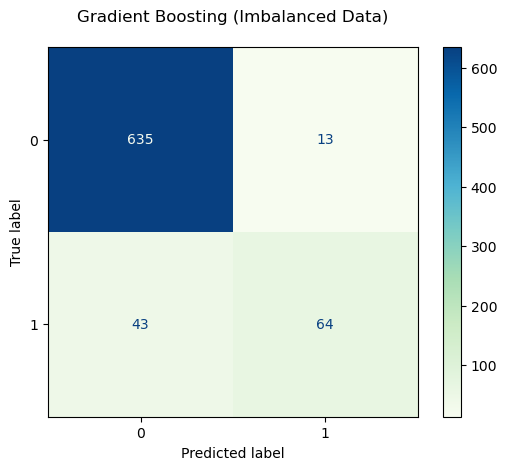

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Logistic Regression (Imbalanced Data)": LogisticRegression(max_iter=200),
    "Decision Tree (Imbalanced Data)": DecisionTreeClassifier(),
    "Random Forest (Imbalanced Data)": RandomForestClassifier(),
    "Gradient Boosting (Imbalanced Data)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"{model_name}:\nAccuracy: {accuracy:.2f}")
    print("\n")

    print(classification_report(y_test, y_pred))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='GnBu')
    plt.title(f"{model_name}\n")
    plt.show()

    print("="*65)
    print("="*65)

#### b) Balanced data with Random Oversampling

In [25]:
# Oversampling
over_sample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = over_sample.fit_resample(X, y)

Random_Over_Sampl_df = pd.concat([X_over, y_over], axis=1, ignore_index=False)
Random_Over_Sampl_df.to_csv('Random Over Sampled Data.csv')

Logistic Regression (Random Oversampling):
Accuracy: 0.77


              precision    recall  f1-score   support

           0       0.79      0.76      0.78       651
           1       0.75      0.78      0.77       607

    accuracy                           0.77      1258
   macro avg       0.77      0.77      0.77      1258
weighted avg       0.77      0.77      0.77      1258



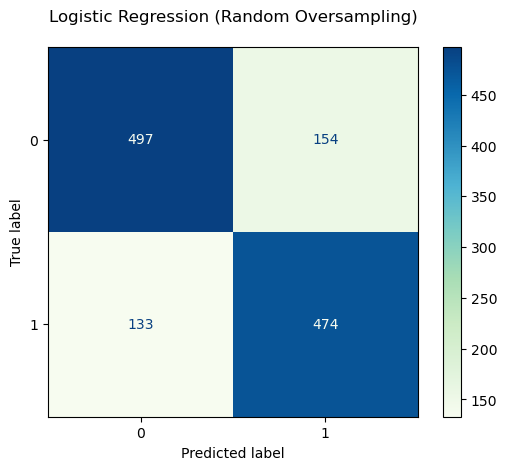

Decision Tree (Random Oversampling):
Accuracy: 0.98


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       651
           1       0.96      1.00      0.98       607

    accuracy                           0.98      1258
   macro avg       0.98      0.98      0.98      1258
weighted avg       0.98      0.98      0.98      1258



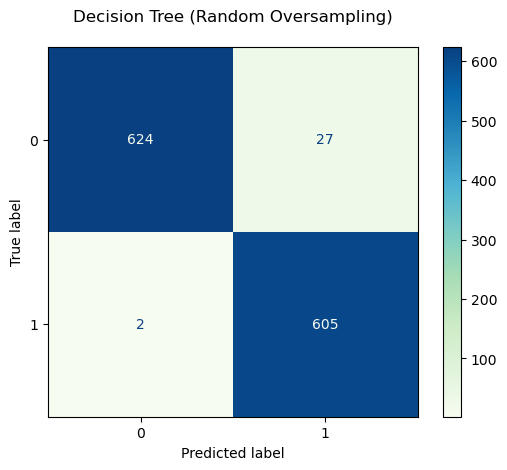

Random Forest (Random Oversampling):
Accuracy: 0.99


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       651
           1       0.98      1.00      0.99       607

    accuracy                           0.99      1258
   macro avg       0.99      0.99      0.99      1258
weighted avg       0.99      0.99      0.99      1258



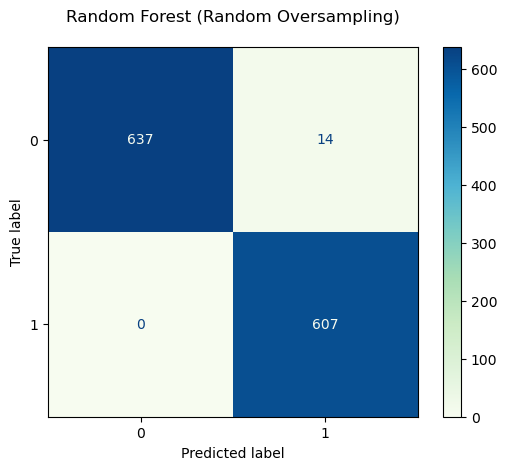

Gradient Boosting (Random Oversampling):
Accuracy: 0.90


              precision    recall  f1-score   support

           0       0.90      0.91      0.91       651
           1       0.90      0.90      0.90       607

    accuracy                           0.90      1258
   macro avg       0.90      0.90      0.90      1258
weighted avg       0.90      0.90      0.90      1258



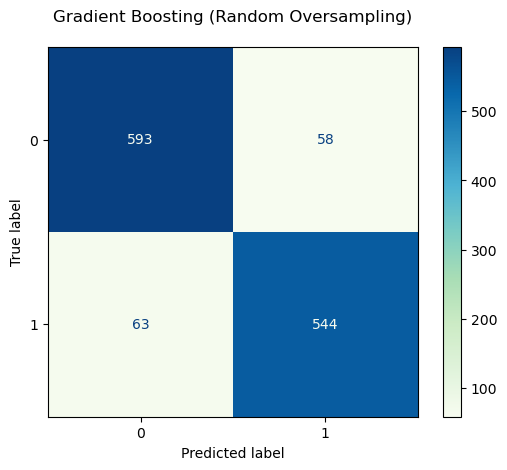

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Logistic Regression (Random Oversampling)": LogisticRegression(max_iter=200),
    "Decision Tree (Random Oversampling)": DecisionTreeClassifier(),
    "Random Forest (Random Oversampling)": RandomForestClassifier(),
    "Gradient Boosting (Random Oversampling)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"{model_name}:\nAccuracy: {accuracy:.2f}")
    print("\n")

    print(classification_report(y_test, y_pred))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='GnBu')
    plt.title(f"{model_name}\n")
    plt.show()

    print("="*65)
    print("="*65)

#### c) Balanced data with SMOTE

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE for oversampling
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

smote_df = pd.concat([X_train_resampled, y_train_resampled], axis=1, ignore_index=False)
smote_df.to_csv('SMOTE Data.csv')

Logistic Regression (SMOTE):
Accuracy: 0.79


              precision    recall  f1-score   support

           0       0.80      0.76      0.78       648
           1       0.77      0.81      0.79       648

    accuracy                           0.79      1296
   macro avg       0.79      0.79      0.79      1296
weighted avg       0.79      0.79      0.79      1296



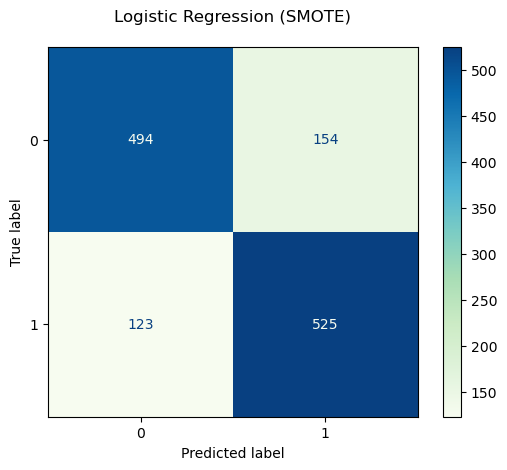

Decision Tree (SMOTE):
Accuracy: 0.85


              precision    recall  f1-score   support

           0       0.80      0.95      0.87       648
           1       0.93      0.76      0.84       648

    accuracy                           0.85      1296
   macro avg       0.87      0.85      0.85      1296
weighted avg       0.87      0.85      0.85      1296



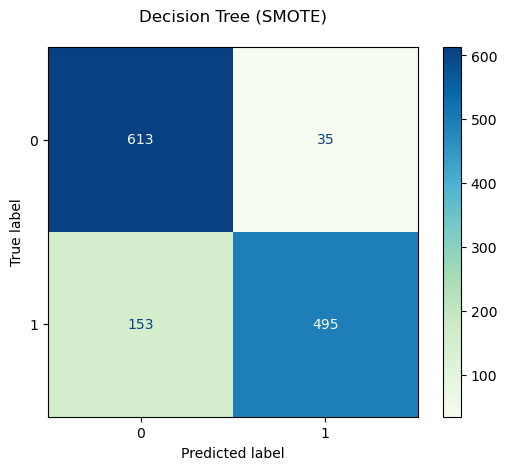

Random Forest (SMOTE):
Accuracy: 0.90


              precision    recall  f1-score   support

           0       0.84      0.99      0.91       648
           1       0.98      0.81      0.89       648

    accuracy                           0.90      1296
   macro avg       0.91      0.90      0.90      1296
weighted avg       0.91      0.90      0.90      1296



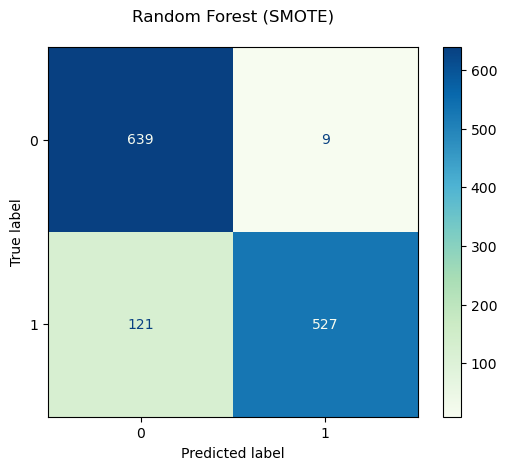

Gradient Boosting (SMOTE):
Accuracy: 0.86


              precision    recall  f1-score   support

           0       0.83      0.91      0.87       648
           1       0.90      0.81      0.85       648

    accuracy                           0.86      1296
   macro avg       0.86      0.86      0.86      1296
weighted avg       0.86      0.86      0.86      1296



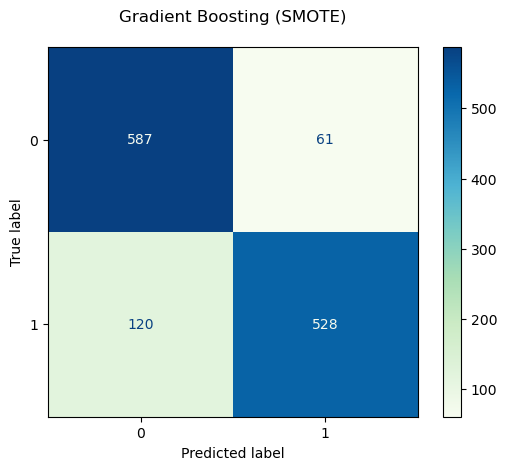

In [28]:
accuracy_all_features = []
# Initialize the models
models = {
    "Logistic Regression (SMOTE)": LogisticRegression(max_iter=200),
    "Decision Tree (SMOTE)": DecisionTreeClassifier(),
    "Random Forest (SMOTE)": RandomForestClassifier(),
    "Gradient Boosting (SMOTE)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_resampled)
    
    accuracy = accuracy_score(y_test_resampled, y_pred)
    accuracy_all_features.append(accuracy)
    conf_matrix = confusion_matrix(y_test_resampled, y_pred)
    print(f"{model_name}:\nAccuracy: {accuracy:.2f}")
    print("\n")

    print(classification_report(y_test_resampled, y_pred))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='GnBu')
    plt.title(f"{model_name}\n")
    plt.show()

    print("="*65)
    print("="*65)

### 5) Feature Selection:

#### a) With Imbalanced Data

In [29]:
X = new_df.iloc[:,2:20]
y = new_df.iloc[:,1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = X_train.select_dtypes(include=['float64', 'int64'])

# Calculate the correlations between features and 'Churn' in y_train
churn_corr = pd.Series([numeric_df[col].corr(y_train) for col in numeric_df.columns], index=numeric_df.columns)

high_corr_features = churn_corr[abs(churn_corr) >= 0.09]

print("Features with correlation >= 0.09 with Churn:")
print(high_corr_features)
print("\n")

Features with correlation >= 0.09 with Churn:
Tenure                     -0.345251
NumberOfDeviceRegistered    0.164453
SatisfactionScore           0.101315
Complain                    0.241117
DaySinceLastOrder          -0.131059
dtype: float64




In [31]:
categorical_df = X_train.select_dtypes(include=['object'])

for col in categorical_df:
    le = preprocessing.LabelEncoder()
    categorical_df[col] = le.fit_transform(categorical_df[col])
    
# Apply Chi-square test
chi2_scores, p_values = chi2(categorical_df, y_train)

# Create a DataFrame to display results
chi2_results = pd.DataFrame({
    'Feature': categorical_df.columns,
    'Chi2 Score': chi2_scores,
    'P-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_results)

                Feature  Chi2 Score   P-value
4         MaritalStatus   21.414160  0.000004
3      PreferedOrderCat   10.716197  0.001062
2                Gender    1.361939  0.243202
1  PreferredPaymentMode    0.066031  0.797205
0  PreferredLoginDevice    0.051378  0.820683


Logistic Regression (Imbalanced Data):
Accuracy: 0.88


              precision    recall  f1-score   support

           0       0.90      0.97      0.93       648
           1       0.66      0.37      0.48       107

    accuracy                           0.88       755
   macro avg       0.78      0.67      0.71       755
weighted avg       0.87      0.88      0.87       755



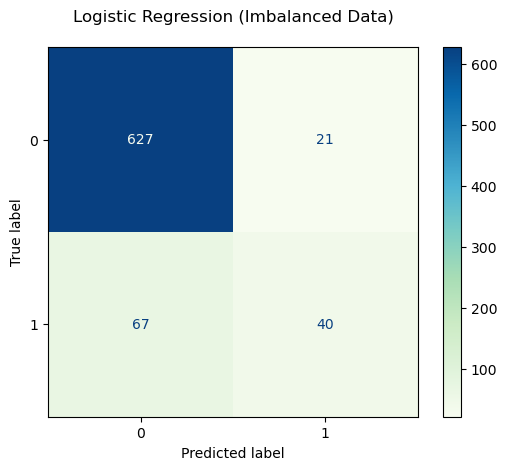

Decision Tree (Imbalanced Data):
Accuracy: 0.94


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       648
           1       0.82      0.75      0.78       107

    accuracy                           0.94       755
   macro avg       0.89      0.86      0.88       755
weighted avg       0.94      0.94      0.94       755



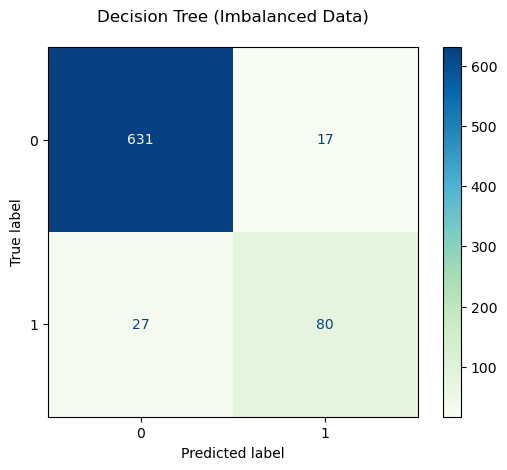

Random Forest (Imbalanced Data):
Accuracy: 0.94


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       648
           1       0.86      0.65      0.74       107

    accuracy                           0.94       755
   macro avg       0.90      0.82      0.85       755
weighted avg       0.93      0.94      0.93       755



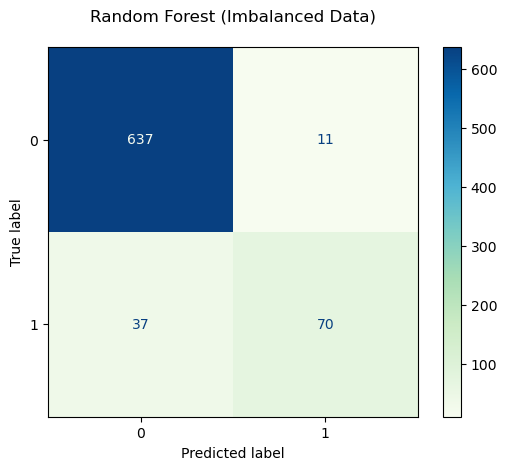

Gradient Boosting (Imbalanced Data):
Accuracy: 0.91


              precision    recall  f1-score   support

           0       0.93      0.98      0.95       648
           1       0.79      0.53      0.64       107

    accuracy                           0.91       755
   macro avg       0.86      0.75      0.79       755
weighted avg       0.91      0.91      0.91       755



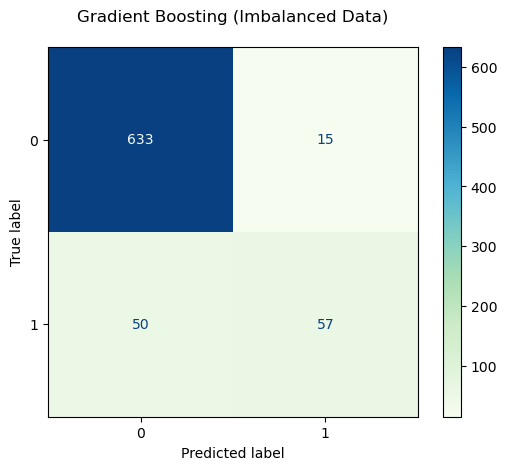

In [32]:
selected_features = ["Tenure", "DaySinceLastOrder", "NumberOfDeviceRegistered", "Complain", 
"SatisfactionScore", "MaritalStatus", "PreferedOrderCat", "Gender"]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

label_encoder = preprocessing.LabelEncoder()

for var in X_train_selected:
    if(type(var) != 'int64' and type(var) != 'float64'):
        X_train_selected[var] = label_encoder.fit_transform(X_train_selected[var])

for var in X_test_selected:
    if(type(var) != 'int64' and type(var) != 'float64'):
        X_test_selected[var] = label_encoder.fit_transform(X_test_selected[var])

# Initialize the models
models = {
    "Logistic Regression (Imbalanced Data)": LogisticRegression(max_iter=200),
    "Decision Tree (Imbalanced Data)": DecisionTreeClassifier(),
    "Random Forest (Imbalanced Data)": RandomForestClassifier(),
    "Gradient Boosting (Imbalanced Data)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"{model_name}:\nAccuracy: {accuracy:.2f}")
    print("\n")

    print(classification_report(y_test, y_pred))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='GnBu')
    plt.title(f"{model_name}\n")
    plt.show()

    print("="*65)
    print("="*65)

#### b) Balanced data with Oversampling

In [33]:
# Oversampling
over_sample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = over_sample.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = X_train.select_dtypes(include=['float64', 'int64'])

# Calculate the correlations between features and 'Churn' in y_train
churn_corr = pd.Series([numeric_df[col].corr(y_train) for col in numeric_df.columns], index=numeric_df.columns)

high_corr_features = churn_corr[abs(churn_corr) >= 0.09]

print("Features with correlation >= 0.09 with Churn:")
print(high_corr_features)
print("\n")

Features with correlation >= 0.09 with Churn:
Tenure                     -0.479612
WarehouseToHome             0.103163
NumberOfDeviceRegistered    0.199699
SatisfactionScore           0.120321
NumberOfAddress             0.101440
Complain                    0.316864
DaySinceLastOrder          -0.189906
CashbackAmount             -0.098546
dtype: float64




In [35]:
categorical_df = X_train.select_dtypes(include=['object'])

for col in categorical_df:
    le = preprocessing.LabelEncoder()
    categorical_df[col] = le.fit_transform(categorical_df[col])
    
# Apply Chi-square test
chi2_scores, p_values = chi2(categorical_df, y_train)

# Create a DataFrame to display results
chi2_results = pd.DataFrame({
    'Feature': categorical_df.columns,
    'Chi2 Score': chi2_scores,
    'P-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_results)

                Feature  Chi2 Score       P-value
4         MaritalStatus   47.568114  5.312560e-12
3      PreferedOrderCat   38.947549  4.353466e-10
2                Gender    2.674989  1.019360e-01
0  PreferredLoginDevice    0.260641  6.096801e-01
1  PreferredPaymentMode    0.001239  9.719201e-01


Logistic Regression (Random Oversampling):
Accuracy: 0.77


              precision    recall  f1-score   support

           0       0.79      0.75      0.77       651
           1       0.74      0.79      0.77       607

    accuracy                           0.77      1258
   macro avg       0.77      0.77      0.77      1258
weighted avg       0.77      0.77      0.77      1258



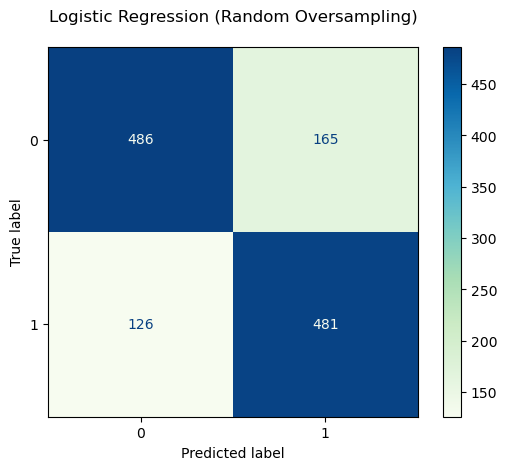

Decision Tree (Random Oversampling):
Accuracy: 0.98


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       651
           1       0.96      1.00      0.98       607

    accuracy                           0.98      1258
   macro avg       0.98      0.98      0.98      1258
weighted avg       0.98      0.98      0.98      1258



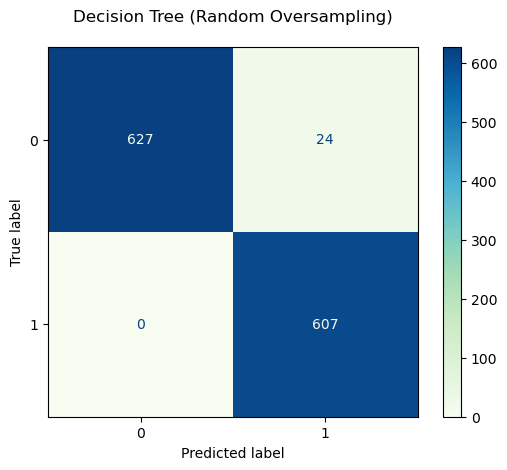

Random Forest (Random Oversampling):
Accuracy: 0.99


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       651
           1       0.97      1.00      0.99       607

    accuracy                           0.99      1258
   macro avg       0.99      0.99      0.99      1258
weighted avg       0.99      0.99      0.99      1258



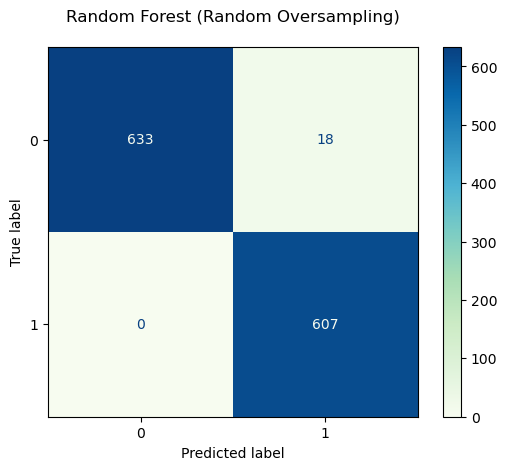

Gradient Boosting (Random Oversampling):
Accuracy: 0.87


              precision    recall  f1-score   support

           0       0.89      0.86      0.87       651
           1       0.85      0.88      0.87       607

    accuracy                           0.87      1258
   macro avg       0.87      0.87      0.87      1258
weighted avg       0.87      0.87      0.87      1258



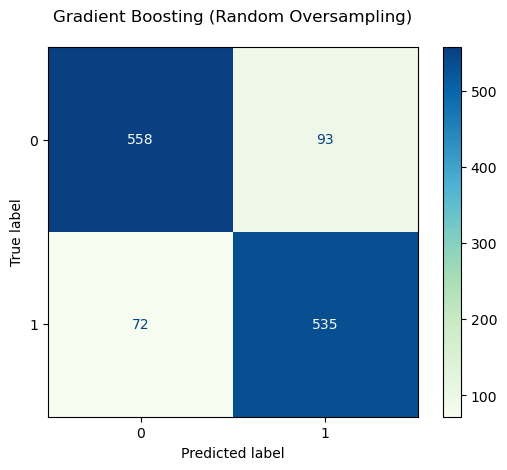

In [36]:
selected_features = ["Tenure", "Complain", "NumberOfDeviceRegistered", "DaySinceLastOrder", 
"WarehouseToHome", "MaritalStatus", "PreferedOrderCat", "Gender"]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

label_encoder = preprocessing.LabelEncoder()

for var in X_train_selected:
    if(type(var) != 'int64' and type(var) != 'float64'):
        X_train_selected[var] = label_encoder.fit_transform(X_train_selected[var])

for var in X_test_selected:
    if(type(var) != 'int64' and type(var) != 'float64'):
        X_test_selected[var] = label_encoder.fit_transform(X_test_selected[var])


# Initialize the models
models = {
    "Logistic Regression (Random Oversampling)": LogisticRegression(max_iter=200),
    "Decision Tree (Random Oversampling)": DecisionTreeClassifier(),
    "Random Forest (Random Oversampling)": RandomForestClassifier(),
    "Gradient Boosting (Random Oversampling)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"{model_name}:\nAccuracy: {accuracy:.2f}")
    print("\n")

    print(classification_report(y_test, y_pred))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='GnBu')
    plt.title(f"{model_name}\n")
    plt.show()

    print("="*65)
    print("="*65)

#### c) Balanced data with SMOTE

In [37]:
#Label encoding 
label_encoder = preprocessing.LabelEncoder()

for var in X:
    if(type(var) != 'int64' and type(var) != 'float64'):
        X[var] = label_encoder.fit_transform(X[var])
        
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE for oversampling
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = X_train_resampled.select_dtypes(include=['float64', 'int64'])

# Calculate the correlations between features and 'Churn' in y_train
churn_corr = pd.Series([numeric_df[col].corr(y_train_resampled) for col in numeric_df.columns], index=numeric_df.columns)

high_corr_features = churn_corr[abs(churn_corr) >= 0.09]

print("Features with correlation >= 0.09 with Churn:")
print(high_corr_features)
print("\n")

Features with correlation >= 0.09 with Churn:
Tenure                     -0.509598
NumberOfDeviceRegistered    0.119414
Complain                    0.134180
DaySinceLastOrder          -0.246295
CashbackAmount             -0.131049
dtype: float64




Logistic Regression (SMOTE) Accuracy: 0.77


              precision    recall  f1-score   support

           0       0.80      0.72      0.76       648
           1       0.74      0.82      0.78       648

    accuracy                           0.77      1296
   macro avg       0.77      0.77      0.77      1296
weighted avg       0.77      0.77      0.77      1296



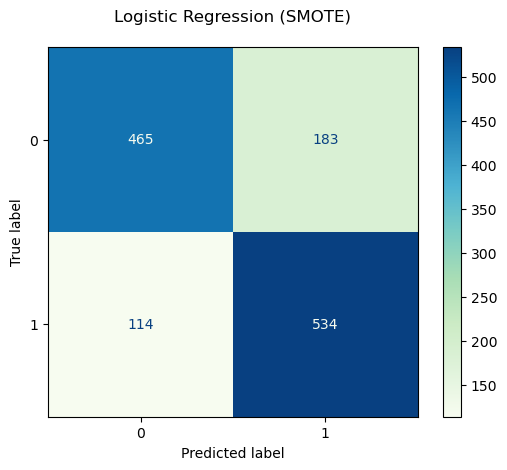

Decision Tree (SMOTE) Accuracy: 0.85


              precision    recall  f1-score   support

           0       0.80      0.95      0.87       648
           1       0.93      0.76      0.84       648

    accuracy                           0.85      1296
   macro avg       0.87      0.85      0.85      1296
weighted avg       0.87      0.85      0.85      1296



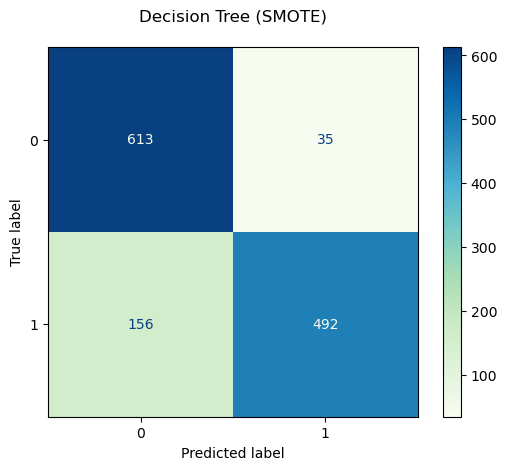

Random Forest (SMOTE) Accuracy: 0.83


              precision    recall  f1-score   support

           0       0.77      0.95      0.85       648
           1       0.93      0.72      0.81       648

    accuracy                           0.83      1296
   macro avg       0.85      0.83      0.83      1296
weighted avg       0.85      0.83      0.83      1296



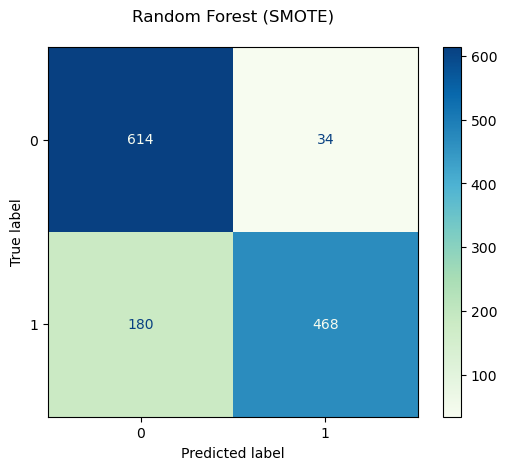

Gradient Boosting (SMOTE) Accuracy: 0.79


              precision    recall  f1-score   support

           0       0.76      0.86      0.81       648
           1       0.84      0.73      0.78       648

    accuracy                           0.79      1296
   macro avg       0.80      0.79      0.79      1296
weighted avg       0.80      0.79      0.79      1296



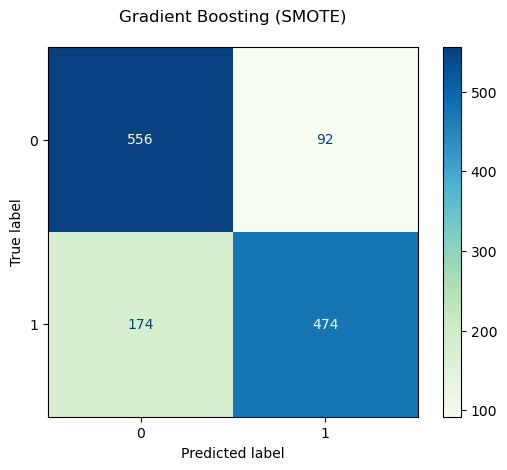

In [39]:
selected_features = ["Tenure", "DaySinceLastOrder", "NumberOfDeviceRegistered", "Complain", 
"CashbackAmount", "MaritalStatus", "PreferedOrderCat", "Gender"]

X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test_resampled[selected_features]

accuracy_important_features = []

# Initialize the models
models = {
    "Logistic Regression (SMOTE)": LogisticRegression(max_iter=200),
    "Decision Tree (SMOTE)": DecisionTreeClassifier(),
    "Random Forest (SMOTE)": RandomForestClassifier(),
    "Gradient Boosting (SMOTE)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(y_test_resampled, y_pred)
    accuracy_important_features.append(accuracy)
    conf_matrix = confusion_matrix(y_test_resampled, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print("\n")

    print(classification_report(y_test_resampled, y_pred))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='GnBu')
    plt.title(f"{model_name}\n")
    plt.show()

    print("="*65)
    print("="*65)

#### d) Hyperparameter Tuning for Logistic Regression

In [40]:
# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # SMOTE for oversampling
# smote = SMOTE(random_state = 42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

log_model = LogisticRegression()
log_model.fit(X_train_selected, y_train_resampled)
y_pred = log_model.predict(X_test_selected)

log_accuracy = accuracy_score(y_test_resampled, y_pred)
print(f'Accuracy of Logistic Regression before hyperparameter tuning: {log_accuracy:.3f}')
print("\n")

param_grid = [
    {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
        'max_iter': [100, 150, 200, 250]
    }
]

clf = GridSearchCV(log_model, param_grid= param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf = clf.fit(X_train_selected, y_train_resampled)
print(f'Best parameters for the logistic regeression: ', best_clf.best_estimator_)
print("\n")
print(f'Accuracy of Logistic Regression after hyperparameter tuning: {best_clf.score(X_test_selected, y_test_resampled):.3f}')

Accuracy of Logistic Regression before hyperparameter tuning: 0.757


Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Best parameters for the logistic regeression:  LogisticRegression(C=0.00026366508987303583, max_iter=150, solver='saga')


Accuracy of Logistic Regression after hyperparameter tuning: 0.768


### 6) Feature Importance:

In [41]:
selected_features = ["DaySinceLastOrder", "NumberOfDeviceRegistered", "Complain", 
"CashbackAmount", "MaritalStatus", "PreferedOrderCat", "Gender"]

X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

accuracy_wo_Tenure = []

# Initialize the models
models = {
    "Logistic Regression (SMOTE)": LogisticRegression(max_iter=200),
    "Decision Tree (SMOTE)": DecisionTreeClassifier(),
    "Random Forest (SMOTE)": RandomForestClassifier(),
    "Gradient Boosting (SMOTE)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_wo_Tenure.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Accuracy after removing 'Tenure':")
    print(f"{model_name}: {accuracy:.2f}")
    print("\n")

Accuracy after removing 'Tenure':
Logistic Regression (SMOTE): 0.61


Accuracy after removing 'Tenure':
Decision Tree (SMOTE): 0.90


Accuracy after removing 'Tenure':
Random Forest (SMOTE): 0.86


Accuracy after removing 'Tenure':
Gradient Boosting (SMOTE): 0.75




In [42]:
selected_features = ["Tenure", "NumberOfDeviceRegistered", "Complain", 
"CashbackAmount", "MaritalStatus", "PreferedOrderCat", "Gender"]

X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

accuracy_wo_DaySinceLastOrder = []

# Initialize the models
models = {
    "Logistic Regression (SMOTE)": LogisticRegression(max_iter=200),
    "Decision Tree (SMOTE)": DecisionTreeClassifier(),
    "Random Forest (SMOTE)": RandomForestClassifier(),
    "Gradient Boosting (SMOTE)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_wo_DaySinceLastOrder.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Accuracy after removing 'DaySinceLastOrder':")
    print(f"{model_name}: {accuracy:.2f}")
    print("\n")

Accuracy after removing 'DaySinceLastOrder':
Logistic Regression (SMOTE): 0.73


Accuracy after removing 'DaySinceLastOrder':
Decision Tree (SMOTE): 0.93


Accuracy after removing 'DaySinceLastOrder':
Random Forest (SMOTE): 0.92


Accuracy after removing 'DaySinceLastOrder':
Gradient Boosting (SMOTE): 0.85




In [43]:
selected_features = ["Tenure", "DaySinceLastOrder", "Complain", 
"CashbackAmount", "MaritalStatus", "PreferedOrderCat", "Gender"]

X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

accuracy_wo_NumberOfDeviceRegistered = []

# Initialize the models
models = {
    "Logistic Regression (SMOTE)": LogisticRegression(max_iter=200),
    "Decision Tree (SMOTE)": DecisionTreeClassifier(),
    "Random Forest (SMOTE)": RandomForestClassifier(),
    "Gradient Boosting (SMOTE)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_wo_NumberOfDeviceRegistered.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Accuracy after removing 'NumberOfDeviceRegistered':")
    print(f"{model_name}: {accuracy:.2f}")
    print("\n")

Accuracy after removing 'NumberOfDeviceRegistered':
Logistic Regression (SMOTE): 0.73


Accuracy after removing 'NumberOfDeviceRegistered':
Decision Tree (SMOTE): 0.95


Accuracy after removing 'NumberOfDeviceRegistered':
Random Forest (SMOTE): 0.93


Accuracy after removing 'NumberOfDeviceRegistered':
Gradient Boosting (SMOTE): 0.84




In [44]:
selected_features = ["Tenure", "DaySinceLastOrder", "NumberOfDeviceRegistered", 
"CashbackAmount", "MaritalStatus", "PreferedOrderCat", "Gender"]

X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

accuracy_wo_Complain = []

# Initialize the models
models = {
    "Logistic Regression (SMOTE)": LogisticRegression(max_iter=200),
    "Decision Tree (SMOTE)": DecisionTreeClassifier(),
    "Random Forest (SMOTE)": RandomForestClassifier(),
    "Gradient Boosting (SMOTE)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_wo_Complain.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Accuracy after removing 'Complain':")
    print(f"{model_name}: {accuracy:.2f}")
    print("\n")

Accuracy after removing 'Complain':
Logistic Regression (SMOTE): 0.72


Accuracy after removing 'Complain':
Decision Tree (SMOTE): 0.93


Accuracy after removing 'Complain':
Random Forest (SMOTE): 0.93


Accuracy after removing 'Complain':
Gradient Boosting (SMOTE): 0.84




In [45]:
selected_features = ["Tenure", "DaySinceLastOrder", "NumberOfDeviceRegistered", "Complain", "MaritalStatus", "PreferedOrderCat", "Gender"]

X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

accuracy_wo_CashbackAmount = []

# Initialize the models
models = {
    "Logistic Regression (SMOTE)": LogisticRegression(max_iter=200),
    "Decision Tree (SMOTE)": DecisionTreeClassifier(),
    "Random Forest (SMOTE)": RandomForestClassifier(),
    "Gradient Boosting (SMOTE)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_wo_CashbackAmount.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Accuracy after removing 'CashbackAmount':")
    print(f"{model_name}: {accuracy:.2f}")
    print("\n")

Accuracy after removing 'CashbackAmount':
Logistic Regression (SMOTE): 0.72


Accuracy after removing 'CashbackAmount':
Decision Tree (SMOTE): 0.87


Accuracy after removing 'CashbackAmount':
Random Forest (SMOTE): 0.88


Accuracy after removing 'CashbackAmount':
Gradient Boosting (SMOTE): 0.84




In [46]:
selected_features = ["Tenure", "DaySinceLastOrder", "NumberOfDeviceRegistered", "Complain", 
"CashbackAmount", "PreferedOrderCat", "Gender"]

X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

accuracy_wo_MaritalStatus = []

# Initialize the models
models = {
    "Logistic Regression (SMOTE)": LogisticRegression(max_iter=200),
    "Decision Tree (SMOTE)": DecisionTreeClassifier(),
    "Random Forest (SMOTE)": RandomForestClassifier(),
    "Gradient Boosting (SMOTE)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_wo_MaritalStatus.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Accuracy after removing 'MaritalStatus':")
    print(f"{model_name}: {accuracy:.2f}")
    print("\n")

Accuracy after removing 'MaritalStatus':
Logistic Regression (SMOTE): 0.73


Accuracy after removing 'MaritalStatus':
Decision Tree (SMOTE): 0.95


Accuracy after removing 'MaritalStatus':
Random Forest (SMOTE): 0.96


Accuracy after removing 'MaritalStatus':
Gradient Boosting (SMOTE): 0.85




In [47]:
selected_features = ["Tenure", "DaySinceLastOrder", "NumberOfDeviceRegistered", "Complain", 
"CashbackAmount", "MaritalStatus", "Gender"]

X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

accuracy_wo_PreferedOrderCat = []

# Initialize the models
models = {
    "Logistic Regression (SMOTE)": LogisticRegression(max_iter=200),
    "Decision Tree (SMOTE)": DecisionTreeClassifier(),
    "Random Forest (SMOTE)": RandomForestClassifier(),
    "Gradient Boosting (SMOTE)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_wo_PreferedOrderCat.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Accuracy after removing 'PreferedOrderCat':")
    print(f"{model_name}: {accuracy:.2f}")
    print("\n")

Accuracy after removing 'PreferedOrderCat':
Logistic Regression (SMOTE): 0.72


Accuracy after removing 'PreferedOrderCat':
Decision Tree (SMOTE): 0.93


Accuracy after removing 'PreferedOrderCat':
Random Forest (SMOTE): 0.93


Accuracy after removing 'PreferedOrderCat':
Gradient Boosting (SMOTE): 0.85




In [48]:
selected_features = ["Tenure", "DaySinceLastOrder", "NumberOfDeviceRegistered", "Complain", 
"CashbackAmount", "MaritalStatus", "PreferedOrderCat"]

X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

accuracy_wo_GenderCat = []

# Initialize the models
models = {
    "Logistic Regression (SMOTE)": LogisticRegression(max_iter=200),
    "Decision Tree (SMOTE)": DecisionTreeClassifier(),
    "Random Forest (SMOTE)": RandomForestClassifier(),
    "Gradient Boosting (SMOTE)": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_wo_GenderCat.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Accuracy after removing 'Gender':")
    print(f"{model_name}: {accuracy:.2f}")
    print("\n")

Accuracy after removing 'Gender':
Logistic Regression (SMOTE): 0.74


Accuracy after removing 'Gender':
Decision Tree (SMOTE): 0.94


Accuracy after removing 'Gender':
Random Forest (SMOTE): 0.94


Accuracy after removing 'Gender':
Gradient Boosting (SMOTE): 0.85




- The most important features are "Tenure", "CashbackAmount", "DaySinceLastOrder" and "Complain".

### 6) Results:

In [49]:
results = {
    "Model": ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    "Accuracy All Features": accuracy_all_features,
    "Accuracy with Important Features": accuracy_important_features,
    "Accuracy without Tenure": accuracy_wo_Tenure,
    "Accuracy without DaySinceLastOrder": accuracy_wo_DaySinceLastOrder,
    "Accuracy without NumberOfDeviceRegistered": accuracy_wo_NumberOfDeviceRegistered,
    "Accuracy without Complain": accuracy_wo_Complain,
    "Accuracy without CashbackAmount": accuracy_wo_CashbackAmount,
    "Accuracy without MaritalStatus": accuracy_wo_MaritalStatus,
    "Accuracy without PreferedOrderCat": accuracy_wo_PreferedOrderCat,
    "Accuracy without Gender": accuracy_wo_GenderCat,
}

In [50]:
res_df = pd.DataFrame(results)

accuracy_col = res_df.columns[1:]
res_df[accuracy_col] = res_df[accuracy_col].applymap(lambda x: f"{round(x * 100, 2)}%")
res_df

,Model,Accuracy All Features,Accuracy with Important Features,Accuracy without Tenure,Accuracy without DaySinceLastOrder,Accuracy without NumberOfDeviceRegistered,Accuracy without Complain,Accuracy without CashbackAmount,Accuracy without MaritalStatus,Accuracy without PreferedOrderCat,Accuracy without Gender
0,Logistic Regression,78.63%,77.08%,60.53%,72.85%,73.11%,72.32%,72.05%,72.72%,72.45%,74.44%
1,Decision Tree,85.49%,85.26%,90.33%,92.98%,95.1%,92.85%,86.75%,95.23%,92.98%,93.64%
2,Random Forest,89.97%,83.49%,86.23%,92.05%,92.72%,92.98%,88.08%,96.29%,92.72%,93.77%
3,Gradient Boosting,86.03%,79.48%,75.1%,84.5%,84.37%,84.24%,84.37%,85.03%,85.17%,84.64%


In [51]:
res_df.to_csv('results.csv')

- After applying models to different types of data it is observed that Random Forest performs well on all types of data.
- In this analysis we select most important 8 parameters to train the model which are "Tenure", "DaySinceLastOrder", "NumberOfDeviceRegistered", "Complain", "CashbackAmount", "MaritalStatus", "PreferedOrderCat", "Gender". All other features are removed.
- After feature selection performance of the Random over-sampled data is best over all the types of data.